In [166]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import gensim


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [167]:
Consumer_Key = "03tw5YnWVt8jWRYpETZEoEhFA"
Consumer_Secret_Key = "f2oCRtMpoJA3Df6I5mqhrqw6JQPwy1uY2E8D44WA1vpOYg474a"
Access_Token = "919198844725772289-clmZ3sG1lcTjcow9x1XErw11P6EKiaJ"
Access_Token_Secret = "x9ngau4qv5m0tq3ZplOZZuxvVqzgPvq1sK65t2iQeQUTZ"

In [168]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)



In [177]:
name = input("enter the twitter handle of the person you want to analysise the tweets ")

enter the twitter handle of the person you want to analysise the tweets COVIDNewsByMIB


In [178]:

posts = api.user_timeline(screen_name=name, count = 100, lang ="en", tweet_mode="extended")

corpus = []
a=1
for tweet in posts[:7]:
    print(str(a) +') '+ tweet.full_text + '\n')
    corpus.append(tweet.full_text.lower())
    a= a+1


1) #IndiaFightsCorona:

📍#𝑪𝑶𝑽𝑰𝑫19 𝑽𝒂𝒄𝒄𝒊𝒏𝒆 𝑫𝒐𝒔𝒆𝒔: 𝑨𝒈𝒆-𝒘𝒊𝒔𝒆 𝑫𝒊𝒔𝒕𝒓𝒊𝒃𝒖𝒕𝒊𝒐𝒏

✅ Above 60 years: 38.5%
✅ 45-60 years: 44.7%
✅ 18-44 years: 16.8%

#We4Vaccine
#LargestVaccinationDrive
#Unite2FightCorona 

@ICMRDELHI https://t.co/SrhiM8KWnK

2) #IndiaFightsCorona

📍𝑰𝒏𝒅𝒊𝒂'𝒔 #𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆 𝒂𝒑𝒑𝒓𝒐𝒂𝒄𝒉𝒆𝒔 19.3 𝒄𝒓𝒐𝒓𝒆 𝒎𝒂𝒓𝒌 𝒐𝒇 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒅𝒐𝒔𝒆𝒔.

☑️#StaySafe, follow #COVIDAppropriateBehaviour and get yourself vaccinated💉

#We4Vaccine 
#LargestVaccinationDrive https://t.co/jtIZpCaFcA

3) #CoronaVirusUpdates: 

State-wise details of Total Confirmed #COVID19 cases (till 22 May, 2021, 8 AM) 

➡️States with 1-70000 confirmed cases 
➡️States with 70001-730000 confirmed cases 
➡️States with 730000+ confirmed cases 
➡️Total no. of confirmed cases so far 

#StaySafe https://t.co/343f1x1gAf

4) #CoronaVirusUpdates:

📍#COVID19 India Tracker
(As on 22 May, 2021, 08:00 AM)

➡️Confirmed cases: 2,62,89,290
➡️Recovered: 2,30,70,365 (87.76%)👍
➡️Active cases: 29,23,400 (11.12%)
➡️Deaths: 2,95,525 (1.12%)

#IndiaFights

In [179]:
corpus 

['#indiafightscorona:\n\n📍#𝑪𝑶𝑽𝑰𝑫19 𝑽𝒂𝒄𝒄𝒊𝒏𝒆 𝑫𝒐𝒔𝒆𝒔: 𝑨𝒈𝒆-𝒘𝒊𝒔𝒆 𝑫𝒊𝒔𝒕𝒓𝒊𝒃𝒖𝒕𝒊𝒐𝒏\n\n✅ above 60 years: 38.5%\n✅ 45-60 years: 44.7%\n✅ 18-44 years: 16.8%\n\n#we4vaccine\n#largestvaccinationdrive\n#unite2fightcorona \n\n@icmrdelhi https://t.co/srhim8kwnk',
 "#indiafightscorona\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 #𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆 𝒂𝒑𝒑𝒓𝒐𝒂𝒄𝒉𝒆𝒔 19.3 𝒄𝒓𝒐𝒓𝒆 𝒎𝒂𝒓𝒌 𝒐𝒇 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒅𝒐𝒔𝒆𝒔.\n\n☑️#staysafe, follow #covidappropriatebehaviour and get yourself vaccinated💉\n\n#we4vaccine \n#largestvaccinationdrive https://t.co/jtizpcafca",
 '#coronavirusupdates: \n\nstate-wise details of total confirmed #covid19 cases (till 22 may, 2021, 8 am) \n\n➡️states with 1-70000 confirmed cases \n➡️states with 70001-730000 confirmed cases \n➡️states with 730000+ confirmed cases \n➡️total no. of confirmed cases so far \n\n#staysafe https://t.co/343f1x1gaf',
 '#coronavirusupdates:\n\n📍#covid19 india tracker\n(as on 22 may, 2021, 08:00 am)\n\n➡️confirmed cases: 2,62,89,290\n➡️recovered: 2,30,70,365 (87.76%)👍\n➡️active cases: 29,23,400 (11.12%)\n➡️dea

In [180]:
list_of_simple_preprocess_data = []
for i in corpus:
    list_of_simple_preprocess_data.append(gensim.utils.simple_preprocess(i, deacc=True, min_len=3))
texts = list_of_simple_preprocess_data

In [181]:
bigram = gensim.models.Phrases(list_of_simple_preprocess_data)

In [182]:
from gensim.utils import lemmatize
from nltk.corpus import stopwords


In [183]:
import nltk
nltk.download('stopwords')
stops = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [184]:
def process_texts(texts):
    texts = [[word for word in line if word not in stops] for line in texts]
    texts = [bigram[line] for line in texts]
    texts = [[word.decode("utf-8").split('/')[0] for word in lemmatize(' '.join(line), allowed_tags=re.compile('(NN)'), min_length=5)] for line in texts]
    return texts

In [185]:
import re
train_texts = process_texts(list_of_simple_preprocess_data)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [186]:
train_texts

[['𝑪𝑶𝑽𝑰𝑫', '𝑽𝒂𝒄𝒄𝒊𝒏𝒆', '𝑫𝒐𝒔𝒆𝒔', 'vaccine', 'icmrdelhi', 'https', 'srhim'],
 ['𝑰𝒏𝒅𝒊𝒂',
  '𝒂𝒑𝒑𝒓𝒐𝒂𝒄𝒉𝒆𝒔',
  '𝒄𝒓𝒐𝒓𝒆',
  '𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅',
  '𝒅𝒐𝒔𝒆𝒔',
  'vaccine',
  'https',
  'jtizpcafca'],
 ['state', 'detail', 'total', 'state', 'state', 'state', 'https'],
 ['india',
  'tracker',
  'death',
  'fightcorona',
  'mohfw_india',
  'https',
  'cmugugmjde'],
 ['total', 'covid', 'india', 'death', 'total', 'covid', 'death', 'https'],
 ['medium', 'briefing', 'health', 'ministry', 'today'],
 ['vaccination',
  'status',
  'india',
  'vaccination',
  'coverage',
  'crore',
  'crore',
  'crore',
  'https',
  'yekrekj']]

In [187]:
from gensim.models import LdaModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [188]:
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]


In [189]:
print(dictionary)

Dictionary(33 unique tokens: ['https', 'icmrdelhi', 'srhim', 'vaccine', '𝑪𝑶𝑽𝑰𝑫']...)


In [190]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(0, 1), (3, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(0, 1), (13, 1), (14, 4), (15, 1)], [(0, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(0, 1), (15, 2), (17, 2), (19, 1), (22, 2)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(0, 1), (19, 1), (28, 1), (29, 3), (30, 1), (31, 2), (32, 1)]]


In [192]:
ldamodel = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary,chunksize=1000,random_state=100,passes=50,iterations=100)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [193]:
ldamodel.show_topics()


[(0,
  '0.116*"state" + 0.092*"https" + 0.090*"total" + 0.067*"death" + 0.064*"covid" + 0.039*"vaccine" + 0.039*"india" + 0.039*"detail" + 0.039*"𝑫𝒐𝒔𝒆𝒔" + 0.039*"srhim"'),
 (1,
  '0.076*"crore" + 0.075*"https" + 0.054*"india" + 0.054*"vaccination" + 0.032*"status" + 0.032*"coverage" + 0.032*"yekrekj" + 0.032*"𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅" + 0.032*"jtizpcafca" + 0.032*"𝒂𝒑𝒑𝒓𝒐𝒂𝒄𝒉𝒆𝒔"')]

In [194]:
import pyLDAvis.gensim_models as gensimvis

dis =pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)

In [195]:
pyLDAvis.display(dis)

In [197]:
print('\nPerplexity: ', ldamodel.log_perplexity(corpus,total_docs=100))
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=train_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.4927237832087736

Coherence Score:  0.43671861010523205


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [198]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
   coherence_values = []
   model_list = []
   for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

   return model_list, coherence_values

In [199]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=train_texts, start=2, limit=6, step=1)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

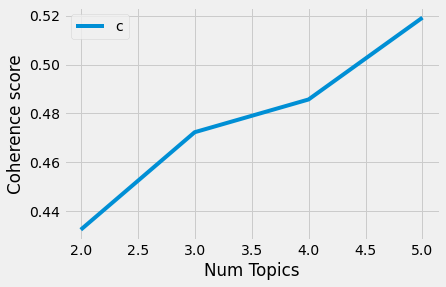

In [200]:
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [201]:
for m, cv in zip(x, coherence_values):
    print("Num of Topics =", m, " has Coherence Value of", round(cv, 4))

Num of Topics = 2  has Coherence Value of 0.4323
Num of Topics = 3  has Coherence Value of 0.4723
Num of Topics = 4  has Coherence Value of 0.4857
Num of Topics = 5  has Coherence Value of 0.5192


In [202]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.088*"death" + 0.088*"https" + 0.088*"fightcorona" + 0.088*"mohfw_india" + 0.088*"cmugugmjde" + 0.088*"india" + 0.088*"tracker" + 0.015*"state" + 0.015*"crore" + 0.015*"total"'),
 (1,
  '0.074*"𝒂𝒑𝒑𝒓𝒐𝒂𝒄𝒉𝒆𝒔" + 0.071*"𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅" + 0.071*"𝒅𝒐𝒔𝒆𝒔" + 0.071*"𝑰𝒏𝒅𝒊𝒂" + 0.068*"https" + 0.068*"vaccine" + 0.068*"jtizpcafca" + 0.058*"𝒄𝒓𝒐𝒓𝒆" + 0.018*"india" + 0.018*"death"'),
 (2,
  '0.194*"state" + 0.148*"total" + 0.102*"https" + 0.102*"covid" + 0.102*"death" + 0.056*"india" + 0.055*"detail" + 0.009*"vaccine" + 0.009*"crore" + 0.009*"today"'),
 (3,
  '0.096*"https" + 0.096*"vaccine" + 0.070*"𝑽𝒂𝒄𝒄𝒊𝒏𝒆" + 0.070*"𝑫𝒐𝒔𝒆𝒔" + 0.070*"srhim" + 0.070*"𝑪𝑶𝑽𝑰𝑫" + 0.070*"icmrdelhi" + 0.044*"𝒄𝒓𝒐𝒓𝒆" + 0.037*"jtizpcafca" + 0.036*"𝑰𝒏𝒅𝒊𝒂"'),
 (4,
  '0.148*"crore" + 0.102*"vaccination" + 0.056*"https" + 0.056*"india" + 0.055*"coverage" + 0.055*"status" + 0.055*"yekrekj" + 0.055*"health" + 0.055*"briefing" + 0.055*"today"')]

In [203]:
dis =pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)

In [204]:
pyLDAvis.display(dis)

In [ ]:
#pyLDAvis.prepare(ldamodel, corpus, dictionary,train_texts,corpus)


In [205]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,#IndiaFightsCorona:\n\n📍#𝑪𝑶𝑽𝑰𝑫19 𝑽𝒂𝒄𝒄𝒊𝒏𝒆 𝑫𝒐𝒔𝒆𝒔...
1,#IndiaFightsCorona\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 #𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊...
2,#CoronaVirusUpdates: \n\nState-wise details of...
3,#CoronaVirusUpdates:\n\n📍#COVID19 India Tracke...
4,#CoronaVirusUpdates: \n\n📍Total #COVID19 Cases...


In [206]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
#  text = text.lower()
#  text = text.split()
#  ps = PorterStemmer()
#  text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
#  text = ' '.join(text)
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:4: Dep

,Tweets
0,IndiaFightsCorona:\n\n📍𝑪𝑶𝑽𝑰𝑫19 𝑽𝒂𝒄𝒄𝒊𝒏𝒆 𝑫𝒐𝒔𝒆𝒔: ...
1,IndiaFightsCorona\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆...
2,CoronaVirusUpdates: \n\nState-wise details of ...
3,CoronaVirusUpdates:\n\n📍COVID19 India Tracker\...
4,CoronaVirusUpdates: \n\n📍Total COVID19 Cases i...
...,...
95,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...
96,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...
97,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...
98,IndiaFightsCorona:\n\n📍 Community mobilization...


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

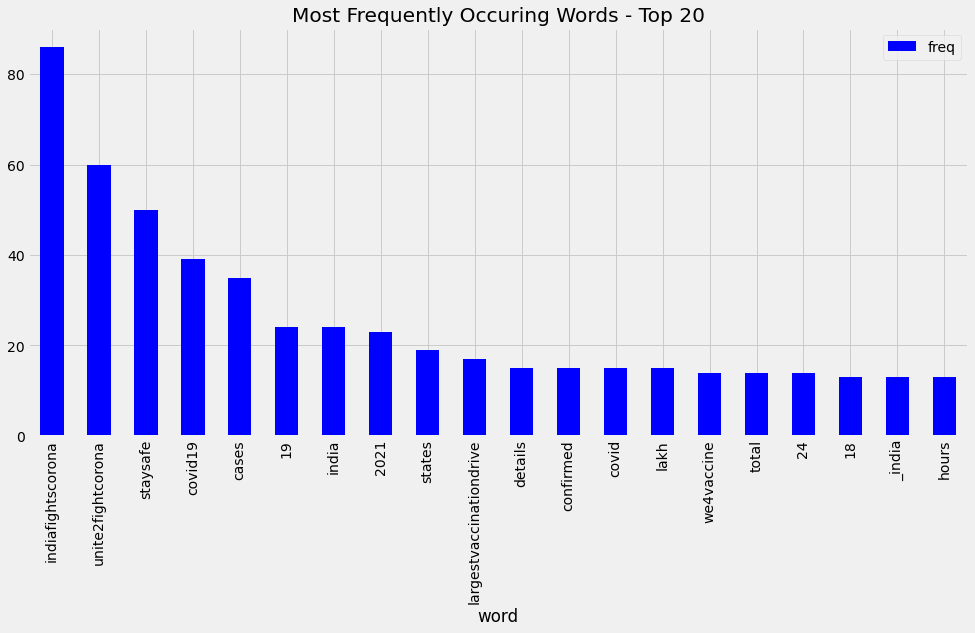

In [208]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Tweets'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 20")



In [209]:

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
   return  TextBlob(text).sentiment.polarity



df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)



df

,Tweets,Subjectivity,Polarity
0,IndiaFightsCorona:\n\n📍𝑪𝑶𝑽𝑰𝑫19 𝑽𝒂𝒄𝒄𝒊𝒏𝒆 𝑫𝒐𝒔𝒆𝒔: ...,0.100000,0.000000
1,IndiaFightsCorona\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆...,0.000000,0.000000
2,CoronaVirusUpdates: \n\nState-wise details of ...,0.964286,0.300000
3,CoronaVirusUpdates:\n\n📍COVID19 India Tracker\...,0.000000,0.000000
4,CoronaVirusUpdates: \n\n📍Total COVID19 Cases i...,0.783333,0.088889
...,...,...,...
95,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...,0.375000,-0.125000
96,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...,0.597727,0.288636
97,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...,0.848485,0.209091
98,IndiaFightsCorona:\n\n📍 Community mobilization...,0.125000,0.000000


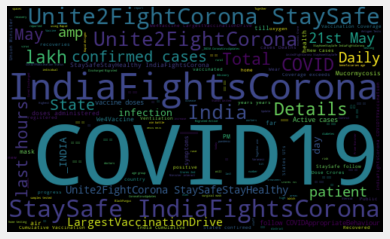

In [210]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#[text for text in df['Tweets'][df['Analysis'] == 'Neutral']]

In [211]:

def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,IndiaFightsCorona:\n\n📍𝑪𝑶𝑽𝑰𝑫19 𝑽𝒂𝒄𝒄𝒊𝒏𝒆 𝑫𝒐𝒔𝒆𝒔: ...,0.100000,0.000000,Neutral
1,IndiaFightsCorona\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆...,0.000000,0.000000,Neutral
2,CoronaVirusUpdates: \n\nState-wise details of ...,0.964286,0.300000,Positive
3,CoronaVirusUpdates:\n\n📍COVID19 India Tracker\...,0.000000,0.000000,Neutral
4,CoronaVirusUpdates: \n\n📍Total COVID19 Cases i...,0.783333,0.088889,Positive
...,...,...,...,...
95,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...,0.375000,-0.125000,Negative
96,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...,0.597727,0.288636,Positive
97,IndiaFightsCorona:\n\n📍 Advisory for COVID19 h...,0.848485,0.209091,Positive
98,IndiaFightsCorona:\n\n📍 Community mobilization...,0.125000,0.000000,Neutral


In [212]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) IndiaFightsCorona:

Highlighting the issue of BlackFungus (Mucormycosis), Union Minister  informed that all the states/UTs have been asked to notify it as an epidemic and ensure that all the cases of black fungus are duly reported.

Unite2FightCorona 
StaySafe 

2) IndiaFightsCorona:

Briefing about the COVID situation in country, Union Minister  outlined that at present there are 30,27,925 active cases in the country. In last 24 hours, 3,57,295 COVID patients have recovered and a recovery rate of 87.25% is being observed 

3) CoronaFacts:

📍Myth:- It is not safe to take COVID19Vaccine during menstruation❓❓

↗️ Fact:- Menstruation has no effect on COVID-19 Vaccine efficacy.

MythBuster 
IndiaFightsCorona LargestVaccinationDrive 

4) IndiaFightsCorona:

In the backdrop of reports of Black Fungus from States, Govt of India writes to States/UTs

Ensure Robust Practices of Infection Prevention &amp; Control &amp; Sanitation &amp; Hygiene in hospitals for Preve

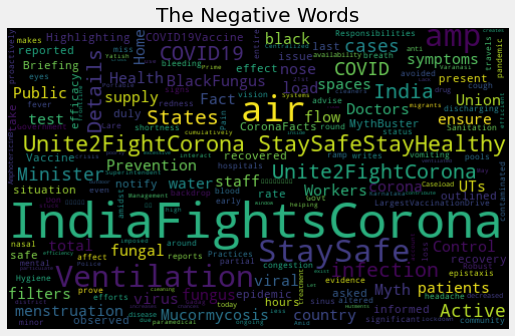

In [213]:
allWords = ' '.join([text for text in df['Tweets'][df['Analysis'] == 'Negative']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(8, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [214]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) CoronaVirusUpdates: 

State-wise details of Total Confirmed COVID19 cases (till 22 May, 2021, 8 AM) 

➡️States with 1-70000 confirmed cases 
➡️States with 70001-730000 confirmed cases 
➡️States with 730000+ confirmed cases 
➡️Total no. of confirmed cases so far 

StaySafe 

2) CoronaVirusUpdates: 

📍Total COVID19 Cases in India (as on May 22, 2021)

▶️87.76% Cured/Discharged/Migrated (2,30,70,365)
▶️11.12% Active cases (29,23,400)
▶️1.12% Deaths (2,95,525)

Total COVID-19 confirmed cases = Cured/Discharged/Migrated+Active cases+Deaths

StaySafe 

3) IndiaFightsCorona:

COVID19Vaccination Status (As on 22nd May, 2021, 8:00 AM)

✅Total vaccine doses administered (so far): 19,33,72,819

✅Vaccine doses administered (in last 24 hours): 14,58,895

We4Vaccine LargestVaccinationDrive

  

4) IndiaFightsCorona:

📍India registered more than 3.5 lakh (3,57,630) COVID19 recoveries in the last 24 hours.

☑️Together, we can win the battle against COVID-19.

➡️StaySafe a

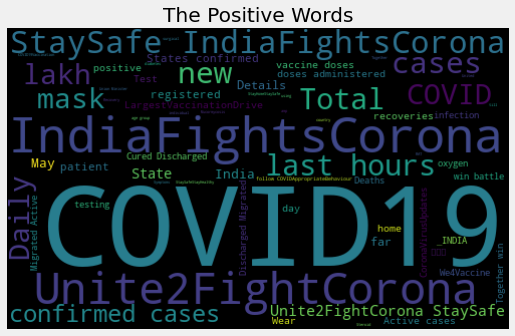

In [215]:
allWords = ' '.join([text for text in df['Tweets'][df['Analysis'] == 'Positive']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(8, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

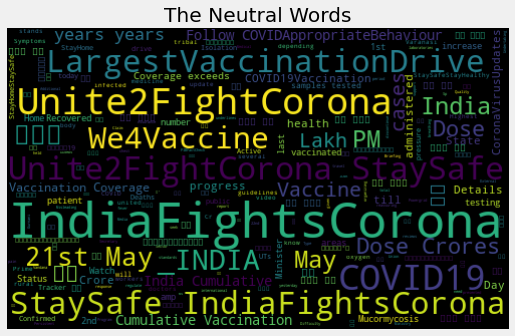

In [216]:
allWords = ' '.join([text for text in df['Tweets'][df['Analysis'] == 'Neutral']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(8, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

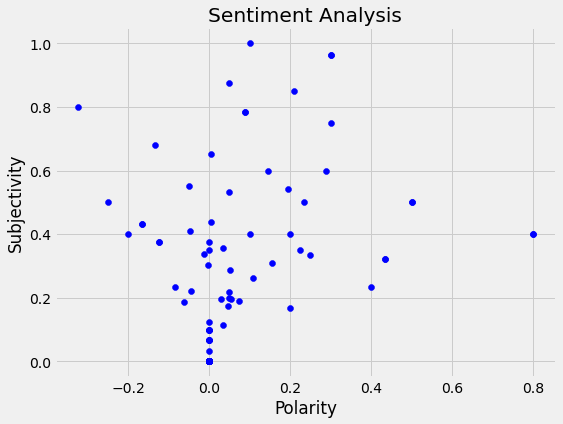

In [217]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [87]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


58.0

In [88]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

7.0

In [89]:
# Show the value counts
df['Analysis'].value_counts()

Positive    58
Neutral     35
Negative     7
Name: Analysis, dtype: int64

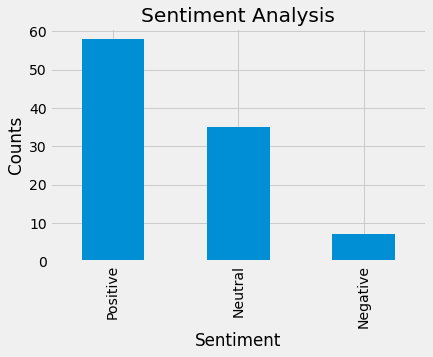

In [90]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

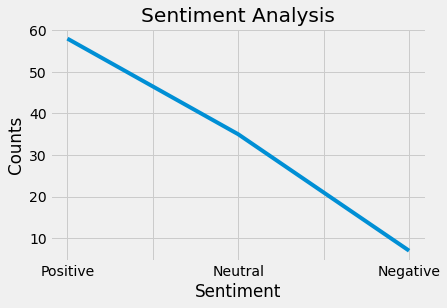

In [91]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

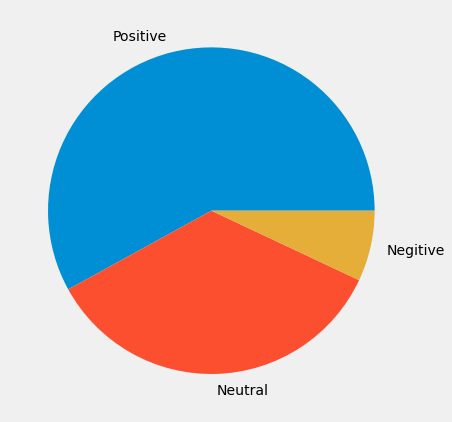

In [92]:
y = np.array(df['Analysis'].value_counts())

mylabels = ["Positive", "Neutral", "Negitive"]

plt.figure(figsize=(8, 7))
plt.pie(y, labels = mylabels)
plt.show() 